# Machine Learning 1 - Supervised Learning - Linear Regressions

* Machine Learning is an AI technique that teaches computers to learn from experience. Machine learning algorithms use computational methods to “learn” information directly from data without relying on a predetermined equation as a model.
* Machine learning uses two types of techniques: **supervised learning**, which trains a model on known input and output data so that it can predict future outputs, and **unsupervised learning**, which finds hidden patterns or intrinsic structures in input data

# 1-Simple Linear Regression

The main goal is to find a true function that expresses the relationship between the dependent and independent variable.
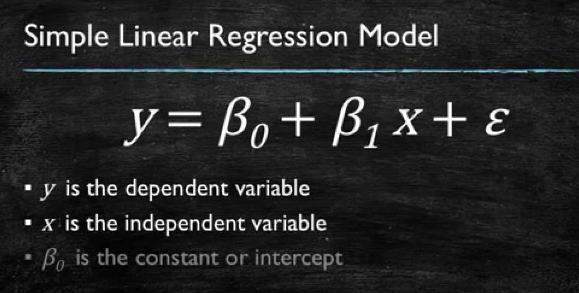

In [1]:
# Let's import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt

df = pd.read_csv("/kaggle/input/salary-data-prediction/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


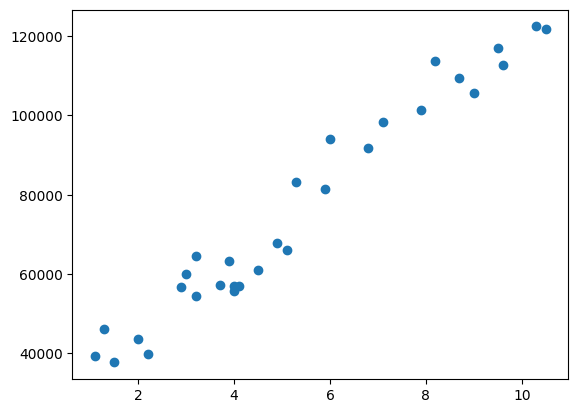

In [3]:
X = df["YearsExperience"]  # independent variable
y = df["Salary"]  # dependent variable
plt.scatter(X,y)
plt.show()

## Creating Model with StatsModel

* R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable
* F-Statistic; gives us information about the meaningfulness of the model
* P > |t| The result tells us whether the variable is significant or not.

In [4]:
constant = sm.add_constant(X)
model = sm.OLS(y,constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        19:33:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

In [6]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.579e+04,2273.053,11.347,0.000,2.11e+04,3.04e+04
YearsExperience,9449.9623,378.755,24.950,0.000,8674.119,1.02e+04


In [7]:
# Confidence intervals;
model.conf_int()

,0,1
const,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [8]:
# significance of the model

print("f_pvalue", "%.5f" % model.f_pvalue)

f_pvalue 0.00000


In [9]:
# regression formula

print("Salary = " + str("%.2f" % model.params[0] + " + YearsExperience*"+ str("%.2f" % model.params[1])))

Salary = 25792.20 + YearsExperience*9449.96


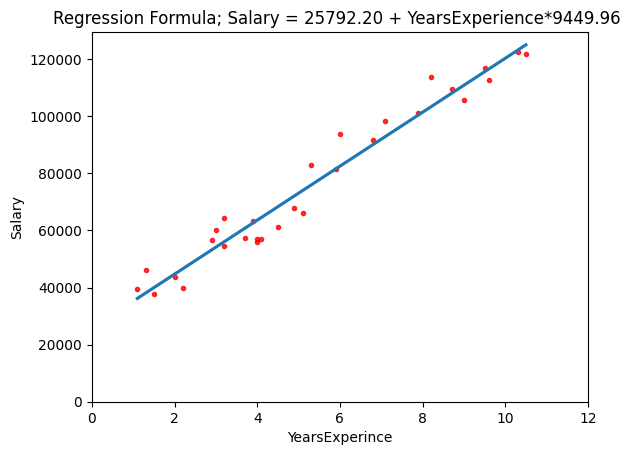

In [10]:
g = sns.regplot(data=df, x=df["YearsExperience"], y=df["Salary"], ci=None, scatter_kws={"color":"r", "s":9})
g.set_title("Regression Formula; Salary = 25792.20 + YearsExperience*9449.96 ")
g.set_ylabel("Salary")
g.set_xlabel("YearsExperince")
plt.xlim(0,12)
plt.ylim(bottom=0)
plt.show()

In [11]:
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors)
rmse = mt.mean_squared_error(y, model.fittedvalues, squared=False)
rmse

5592.043608760662

In [12]:
# Comparing Real and Predict then see Residuals

pd.DataFrame ({"Real":y,
               "Predict": model.fittedvalues,
               "Residuals": model.resid})

,Real,Predict,Residuals
0,39343.0,36187.158752,3155.841248
1,46205.0,38077.151217,8127.848783
2,37731.0,39967.143681,-2236.143681
3,43525.0,44692.124842,-1167.124842
4,39891.0,46582.117306,-6691.117306
5,56642.0,53197.090931,3444.909069
6,60150.0,54142.087163,6007.912837
7,54445.0,56032.079627,-1587.079627
8,64445.0,56032.079627,8412.920373
9,57189.0,60757.060788,-3568.060788


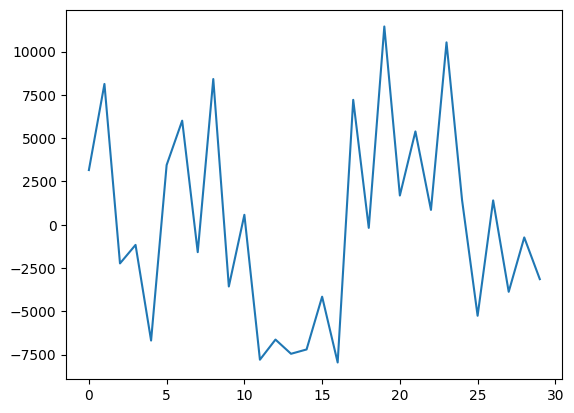

In [13]:
plt.plot(model.resid)
plt.show()

## Creating Model with Sklearn

In [14]:
lr=LinearRegression()
lr.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))
lr.coef_, lr.intercept_

(array([[9449.96232146]]), array([25792.20019867]))

In [15]:
lr.predict(X.values.reshape(-1,1))

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [16]:
# Let's make a salary estimate when someone with 15 years of experience comes

lr.predict([[15]])

array([[167541.63502049]])

# 2-Multiple Linear Regression

* The main goal is to find a verified function that expresses the relationship between dependent and independent variables.
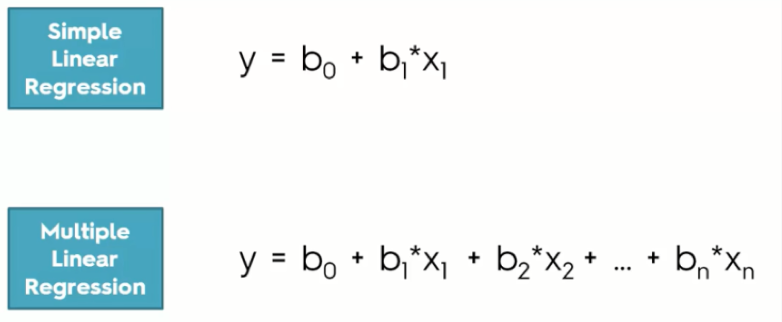

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt

df = pd.read_csv("/kaggle/input/advertising-dataset/Advertising.csv", usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


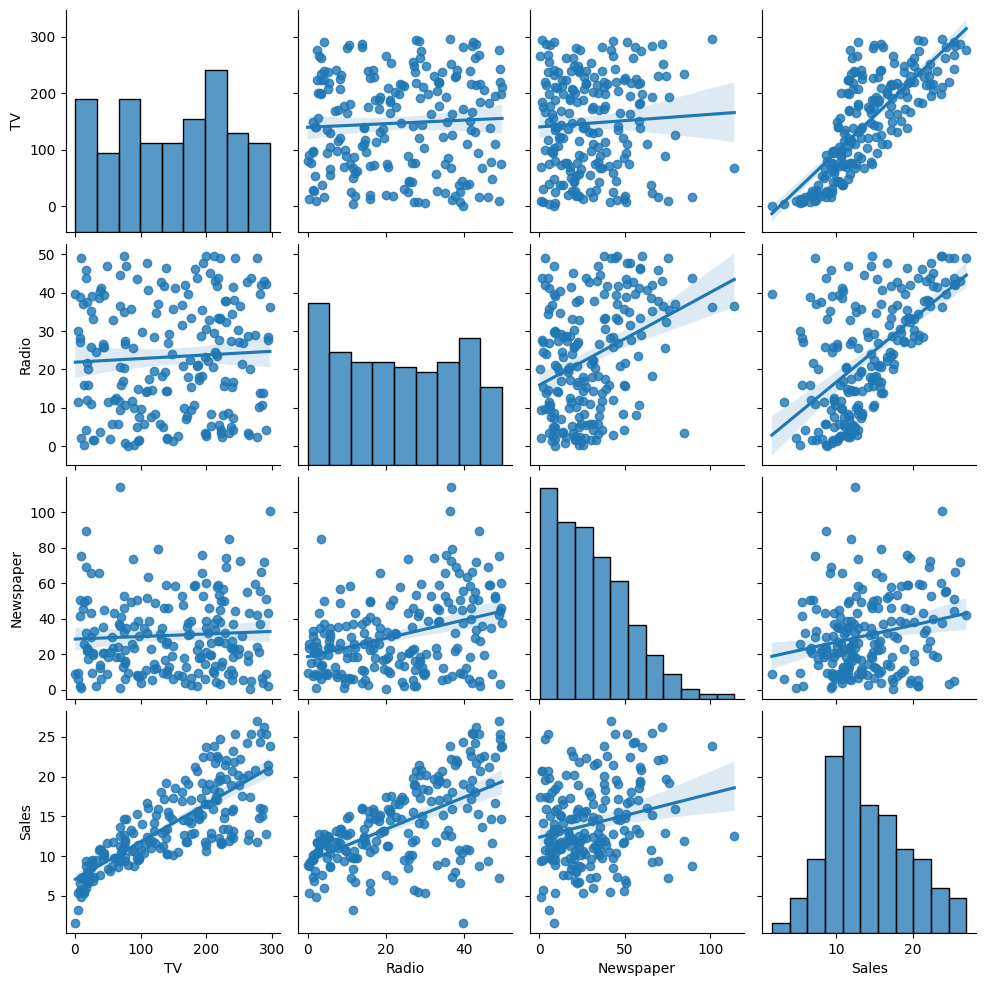

In [19]:
# Let's see relationships between variables

sns.pairplot(data=df, kind="reg")
plt.show()

In [20]:
y=df["Sales"]
X=df[["TV","Radio","Newspaper"]]

constant = sm.add_constant(X)
model = sm.OLS(y,constant).fit()
model.summary()

# Since newspaper's variable is meaningless, we remove it from the model. (p>|t| value > 0,05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        19:33:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y=df["Sales"]
X=df[["TV","Radio"]]

constant = sm.add_constant(X)
model = sm.OLS(y,constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        19:33:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=53)
X_train

,TV,Radio
86,76.3,27.5
24,62.3,12.6
28,248.8,27.1
187,191.1,28.7
52,216.4,41.7
...,...,...
189,18.7,12.1
165,234.5,3.4
117,76.4,0.8
29,70.6,16.0


In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predict_values=lr.predict(X_test)
print(predict_values) 

[ 8.82488614  7.61072852 18.63073688  8.41488212 13.94646976 12.30626324
 12.90718168 20.71265035  8.98824702 24.70120797 14.41154289  9.8135971
 19.64209084 12.6917336  17.29732438 17.27881157 19.893283   12.41143999
 12.40819796 17.20336445  9.16050897  6.17099724 17.75602139  9.7514287
 15.64210065 11.38732755 11.42841992  7.42417269 16.42605386 21.07332068
 13.40065839 18.39321056  3.77251944 16.30601862  7.9368221   8.44074168
 10.6561594   5.32748962  7.87069489 12.194666  ]


In [24]:
pd.DataFrame({"Real":y_test,
             "Predict":predict_values}).sort_index()

,Real,Predict
1,10.4,12.306263
8,4.8,3.772519
50,11.4,12.691734
53,21.2,19.893283
66,9.5,8.988247
70,18.3,17.756021
71,12.4,10.656159
74,17.0,17.297324
80,11.8,11.428420
95,16.9,16.306019


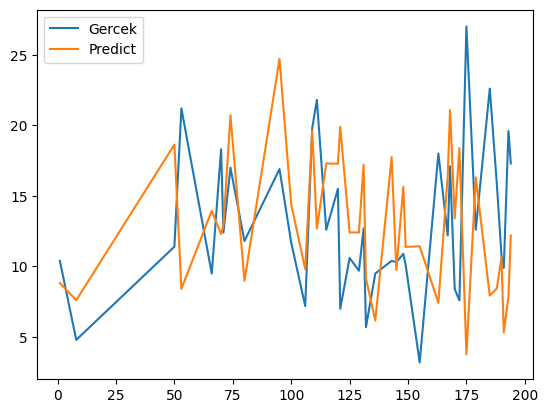

In [25]:
y_test=y_test.sort_index()
df_compare = pd.DataFrame({"Gercek":y_test,
                          "Predict":predict_values})
df_compare.plot();

In [26]:
lr.coef_, lr.intercept_

(array([0.04567937, 0.18531867]), 2.99050765903816)

In [27]:
r2=mt.r2_score(y_test,predict_values)
mse=mt.mean_squared_error(y_test,predict_values)
rmse=mt.mean_squared_error(y_test,predict_values, squared=False)
mae=mt.mean_absolute_error(y_test, predict_values)
r2, mse, rmse, mae

(-0.9720288201154921, 53.723537439921834, 7.329634195505382, 5.669659559350858)

In [28]:
# Cross Validation
cross_val_score(lr, X, y, cv=10, scoring="r2")

array([0.87936561, 0.85860496, 0.92960574, 0.89040105, 0.93302554,
       0.93129743, 0.76486772, 0.91373255, 0.83925519, 0.92951475])

In [29]:
np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring="neg_mean_squared_error"))

array([1.83919703, 1.81310798, 1.44632468, 1.67864347, 1.12832213,
       1.32057507, 2.82853515, 1.44100984, 1.74251342, 1.55851965])

In [30]:
np.sqrt(-cross_val_score(lr, X, y, cv=10, scoring="neg_mean_squared_error")).mean()

1.6796748419090761

# 3-Polynominal Regression

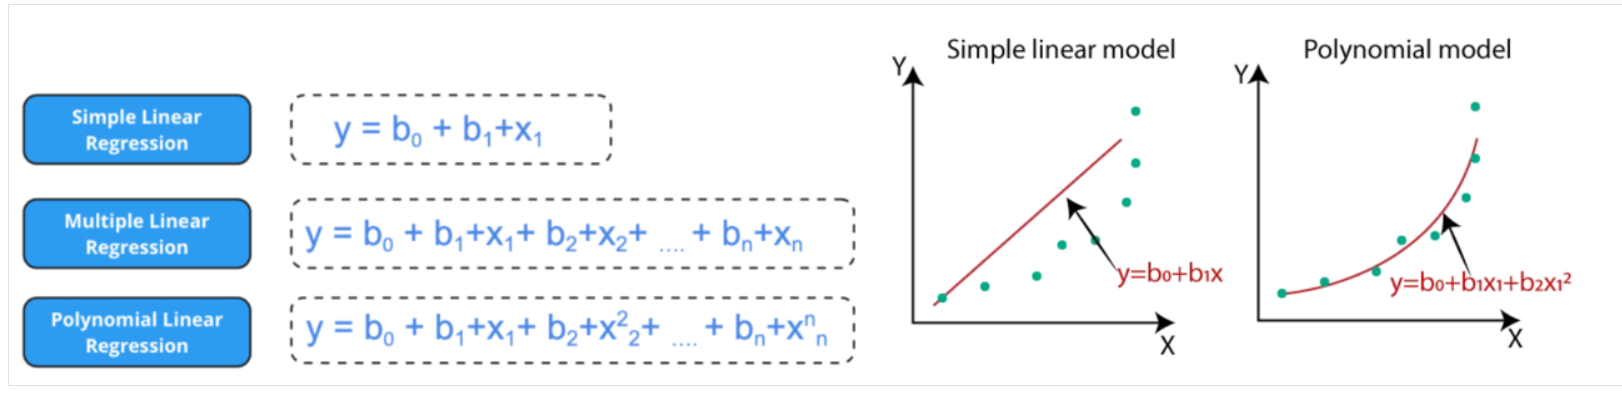

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as mt

df = pd.read_csv("/kaggle/input/position-salaries/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


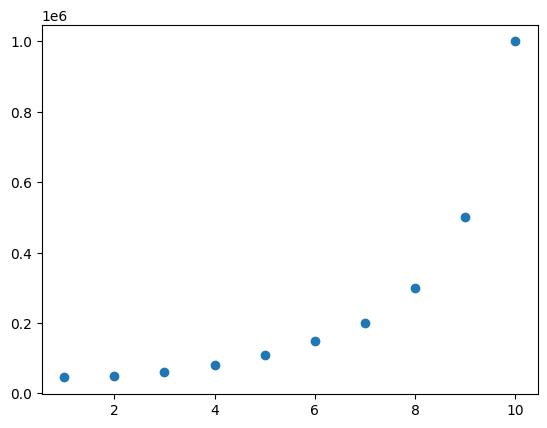

In [32]:
y = df["Salary"]
X = df["Level"]

plt.scatter(X,y)
plt.show()

In [33]:
X = X.values.reshape(-1,1)

In [34]:
lr = LinearRegression()
lr.fit(X,y)
predict_value = lr.predict(X)
r2_linear = mt.r2_score(y,predict_value)
mse_linear = mt.mean_squared_error(y,predict_value)

print("Linear R2 = ", r2_linear, "Linear Mse = ", mse_linear)

Linear R2 =  0.6690412331929895 Linear Mse =  26695878787.878784


In [35]:
pol = PolynomialFeatures(degree=2)
X_pol = pol.fit_transform(X)

lr2 = LinearRegression()
lr2.fit(X_pol,y)
predict_value2 = lr2.predict(X_pol)

r2_pol = mt.r2_score(y,predict_value2)
mse_pol = mt.mean_squared_error(y,predict_value2)

print("Pol R2 = ", r2_pol, "Pol Mse = ", mse_pol)

# R2 value increased with polynomial regression

Pol R2 =  0.9162082221443942 Pol Mse =  6758833333.333338


In [36]:
# Let's make degree=3
pol = PolynomialFeatures(degree=3)
X_pol = pol.fit_transform(X)

lr2 = LinearRegression()
lr2.fit(X_pol,y)
predict_value3 = lr2.predict(X_pol)

r2_pol = mt.r2_score(y,predict_value3)
mse_pol = mt.mean_squared_error(y,predict_value3)

print("Pol R2 = ", r2_pol, "Pol Mse = ", mse_pol)

Pol R2 =  0.9812097727913366 Pol Mse =  1515662004.6620114


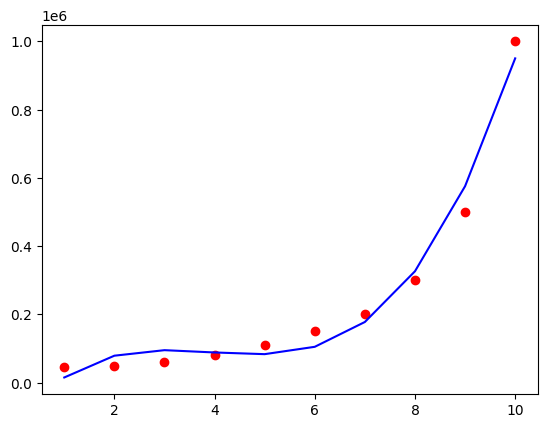

In [37]:
plt.scatter(X,y, color="red")
plt.plot(X,predict_value3, color="blue")
plt.show()

# 4-Ridge Regression 

* Also referred to as "L2 Correction"
* Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.
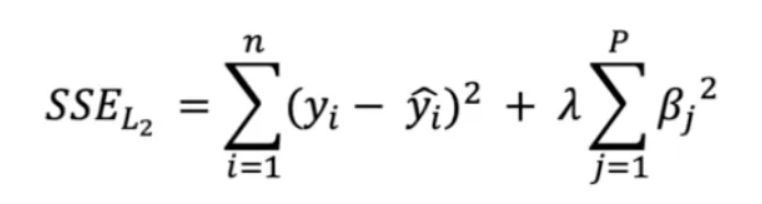

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
import sklearn.metrics as mt

df = pd.read_csv("/kaggle/input/advertising-dataset/Advertising.csv", usecols=[1,2,3,4])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
y = df["Sales"]
X = df.drop(columns="Sales", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2 = mt.r2_score(y_test, y_pred)
mse = mt.mean_squared_error(y_test, y_pred)

print("R2 Score = ",r2,"MSE Score =", mse)

R2 Score =  0.899438024100912 MSE Score = 3.1740973539761033


In [40]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred2= ridge_model.predict(X_test)

r2_rid = mt.r2_score(y_test, y_pred2)
mse_rid = mt.mean_squared_error(y_test, y_pred2)

print("R2 Rid Score = ",r2_rid,"MSE Rid Score =", mse_rid)

R2 Rid Score =  0.899438032178932 MSE Rid Score = 3.1740970990047623


### Model Tuning

In [41]:
# Let's find the best alpha value with Ridgecv
alphas_numbers = 10 ** np.linspace(10,-2,100100)*0.5

ridge_cv = RidgeCV(alphas=alphas_numbers, scoring="r2") #scoring="neg_mean_sqaurd_error"
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

246.7196288097843

In [42]:
ridge_model = Ridge(alpha=246.7196288097843)
ridge_model.fit(X_train, y_train)
y_pred2= ridge_model.predict(X_test)

r2_rid = mt.r2_score(y_test, y_pred2)
mse_rid = mt.mean_squared_error(y_test, y_pred2)

print("R2 Rid Score = ",r2_rid,"MSE Rid Score =", mse_rid)

R2 Rid Score =  0.8994414969985387 MSE Rid Score = 3.1739877368462808


# 5-Lasso Regression

* Also referred to as "L1 Correction"
* Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean
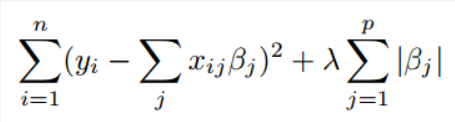

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LassoCV
import sklearn.metrics as mt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("/kaggle/input/boston-data-set/boston.csv")
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
y = df["Price"]
X = df.drop(columns="Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)

print ("Ridge Train = " , ridge_model.score(X_train, y_train), "Ridge Test = ", ridge_model.score(X_test, y_test), "R2", mt.r2_score(y_test, y_pred))

Ridge Train =  0.750827350977196 Ridge Test =  0.6686244122021413 R2 0.6686244122021413


In [45]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

print ("Lasso Train = " , lasso_model.score(X_train, y_train), "Lasso Test = ", lasso_model.score(X_test, y_test))

Lasso Train =  0.7382419735910875 Lasso Test =  0.6569712802223936


In [46]:
print(ridge_model.coef_)
print(lasso_model.coef_) # there is a variable set to 0 in lasso !!!

[-1.12399694e-01  3.04593914e-02  3.48958400e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474388e-03 -1.42960751e+00
  2.60042840e-01 -1.07802286e-02 -9.00771040e-01  1.24004789e-02
 -5.10902332e-01]
[-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


In [47]:
# Let's see how many variables we set to 0 in total.

print("Total Number of Variable;" ,np.sum(ridge_model.coef_!=0), ", Number of Variables Set to 0 in Lasso;", np.sum(lasso_model.coef_==0))

Total Number of Variable; 13 , Number of Variables Set to 0 in Lasso; 1


### Model Tuning

In [48]:
# alpha optimization

lamb = LassoCV(cv=10, max_iter=10000).fit(X_train,y_train).alpha_
lasso_model2 = Lasso(alpha=lamb)
lasso_model2.fit(X_train,y_train)

print ("Lasso Train = " , lasso_model2.score(X_train, y_train), "Lasso Test = ", lasso_model2.score(X_test, y_test))

Lasso Train =  0.7157406210167571 Lasso Test =  0.6706431115795963


# 6-Elastic Net Regression 

* Elastic net regression is a linear regression technique that uses a penalty term to shrink the coefficients of the predictors. The penalty term is a combination of the l1-norm (absolute value) and the l2-norm (square) of the coefficients, weighted by a parameter called alpha
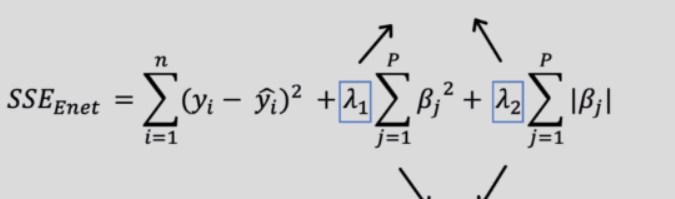

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV
import sklearn.metrics as mt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/kaggle/input/boston-data-set/boston.csv")
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [50]:
y = df["Price"]
X = df.drop(columns="Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_rid = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)
y_pred_las = lasso_model.predict(X_test)

elas_model = ElasticNet(alpha=0.1)
elas_model.fit(X_train, y_train)
y_pred_elas = elas_model.predict(X_test)

print("Ridge Train", ridge_model.score(X_train, y_train))
print("Lasso Train", lasso_model.score(X_train, y_train))
print("Elas Train", elas_model.score(X_train, y_train))

print("Ridge Test", ridge_model.score(X_test, y_test))
print("Lasso Test", lasso_model.score(X_test, y_test))
print("Elas Test", elas_model.score(X_test, y_test))

print("Ridge MSE", mt.mean_squared_error(y_test, y_pred_rid))
print("Lasso MSE", mt.mean_squared_error(y_test, y_pred_las))
print("Elas MSE", mt.mean_squared_error(y_test, y_pred_elas))

Ridge Train 0.750827350977196
Lasso Train 0.7382419735910875
Elas Train 0.7365251888690172
Ridge Test 0.6686244122021413
Lasso Test 0.6569712802223936
Elas Test 0.6667328308555568
Ridge MSE 24.301025500192733
Lasso MSE 25.155593753934173
Elas MSE 24.43974231649327


### Model Tuning

In [51]:
lamb = ElasticNetCV(cv=10, max_iter=10000).fit(X_train, y_train).alpha_

elas_model2 = ElasticNet(alpha=lamb)
elas_model2.fit(X_train, y_train)
y_pred_elas2 = elas_model2.predict(X_test)

print("Elas2 Train", elas_model2.score(X_train, y_train))
print("Elas2 Test", elas_model2.score(X_test, y_test))
print("Elas2 MSE", mt.mean_squared_error(y_test, y_pred_elas2))

Elas2 Train 0.6751044230261126
Elas2 Test 0.6651210319978071
Elas2 MSE 24.55794162442554


# Comparison of All Linear Regression Models

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score # train dataset'inde kaç bölge işlemi yapacaksak o kadar parçalama işlemi yapacak
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import sklearn.metrics as mt
import warnings

warnings.filterwarnings("ignore")

df_orj=pd.read_csv(r"/kaggle/input/usa-housing/USA_Housing.csv")
df = df_orj.copy()
df.drop(columns="Address", axis=1, inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


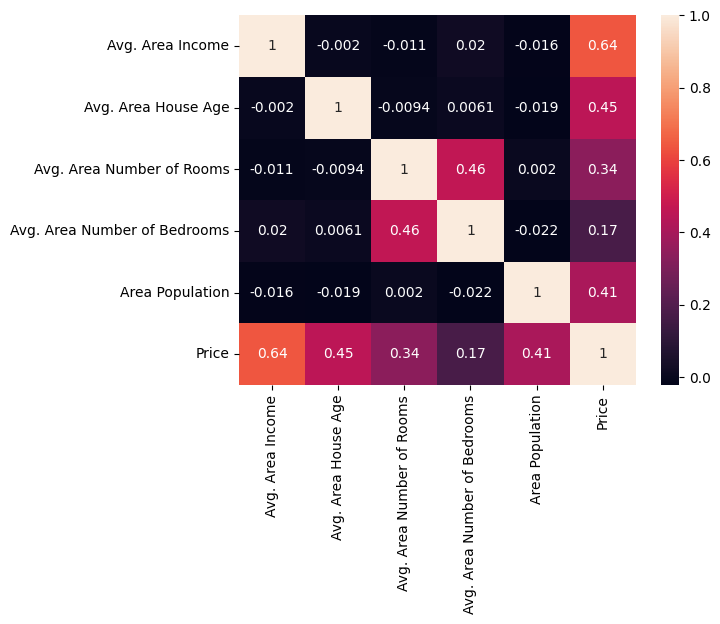

In [53]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [54]:
y= df["Price"]
X=df.drop(columns="Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
# We create 2 functions to compare the models

def cross_val (model):
    cross= cross_val_score(model, X, y, cv=10)
    return cross.mean()

def success (real, pred):
    rmse = mt.mean_squared_error(real, pred, squared=True)
    r2 = mt.r2_score(real, pred)
    return [rmse, r2]

In [56]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)

rid_model = Ridge(alpha=0.1)
rid_model.fit(X_train, y_train)
rid_pred = rid_model.predict(X_test)

las_model = Lasso(alpha=0.1)
las_model.fit(X_train, y_train)
las_pred = las_model.predict(X_test)

elas_model = ElasticNet(alpha=0.1)
elas_model.fit(X_train, y_train)
elas_pred = elas_model.predict(X_test)

pd.options.display.float_format="{:.4f}".format
sonuclar=[["Linear_Model", success(y_test, lin_pred)[0],success(y_test, lin_pred)[1], cross_val(lin_model)],
          ["Ridge_Model", success(y_test, rid_pred)[0],success(y_test, rid_pred)[1], cross_val(rid_model)],
          ["Lasso_Model", success(y_test, las_pred)[0],success(y_test, las_pred)[1], cross_val(las_model)],
          ["ElasticNet_Model", success(y_test, elas_pred)[0],success(y_test, elas_pred)[1], cross_val(elas_model)]]

results = pd.DataFrame(sonuclar, columns=["Model","RMSE","R2","Cross_Val"])
results

,Model,RMSE,R2,Cross_Val
0,Linear_Model,10089009300.8945,0.9180,0.9174
1,Ridge_Model,10089079789.6769,0.9180,0.9174
2,Lasso_Model,10089010510.9944,0.9180,0.9174
3,ElasticNet_Model,10323866842.8999,0.9161,0.9165
